In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mass_csv

In [8]:
# def get_mass(file_name):
#     file = pd.read_csv(file_name)
#     mass = file()
#     return mass

In [9]:
def get_list(file_name):
    file = pd.read_csv(file_name)
    L_moment = file['Long Moment (emu)']
    H = file['Field (Oe)']
    # M = np.zeros(len(L_moment))
    T = file['Temperature (K)']
    # for row in range (1, len(L_moment)):
        # chi[row] = -N_mol/volume * (e_charge**2 * mi_0)/(6*e_mass) * L_moment[row]**2
        # M[row] = L_moment[row]
        # M[row] = M[row]/chi[row]

    return L_moment, H, T

In [10]:
def calculate_chiT(mass, L_moment, H, T):
    M = np.zeros(len(L_moment)) 
    chi_T = np.zeros(len(L_moment)) 

    for row in range (1, len(L_moment)):
        M[row] = L_moment[row]/mass

    for i in range(1, len(H)):
        chi_T[i] = (M[i]/H[i])*T[i]

    return chi_T


FeTrz_Trt_big_FC_FH.rso

path: /home/fara/Documents/IFJ_2023/spin_crossover/dane/Trt_TEOS — kopia/Big TEOS


In [22]:
Trt_big_FC_FH_mass = mass_csv.get_mass()
Trt_big_FC_FH_mass = Trt_big_FC_FH_mass*2.5
print(Trt_big_FC_FH_mass)


Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T = get_list('FeTrz_Trt_big_FC_FH.rso.csv')
Trt_big_FC_FH_chiT = calculate_chiT(Trt_big_FC_FH_mass, Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T)
# print(Trt_big_FC_FH_H)



13.600000000000001
0      1000.0
1      1000.0
2      1000.0
3      1000.0
4      1000.0
        ...  
379    1000.0
380    1000.0
381    1000.0
382    1000.0
383    1000.0
Name: Field (Oe), Length: 384, dtype: float64


Text(0, 0.5, 'ηT ')

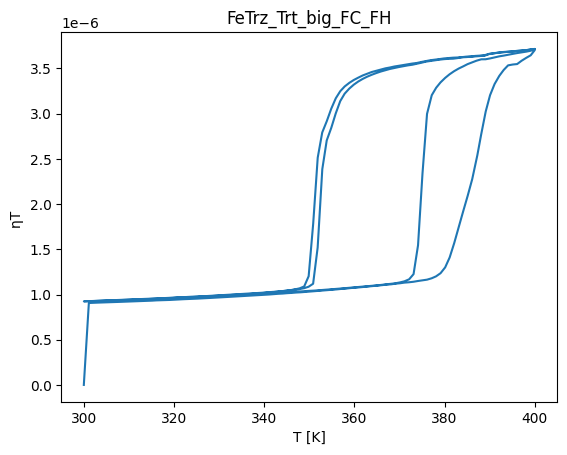

In [21]:
plt.plot(Trt_big_FC_FH_T, Trt_big_FC_FH_chiT)
plt.title('FeTrz_Trt_big_FC_FH')
plt.xlabel('T [K]')
plt.ylabel('ηT ')

FeTrz_Trt_medium_FC_FH.rso

/home/fara/Documents/IFJ_2023/spin_crossover/dane/Trt_TEOS — kopia/Medium TEOS

In [ ]:
Trt_medium_FC_FH_mass = mass_csv.get_mass()
Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T = get_list('FeTrz_Trt_medium_FC_FH.rso.csv')
Trt_medium_FC_FH_chiT = calculate_chiT(Trt_medium_FC_FH_mass, Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T)

Text(0, 0.5, 'ηT ')

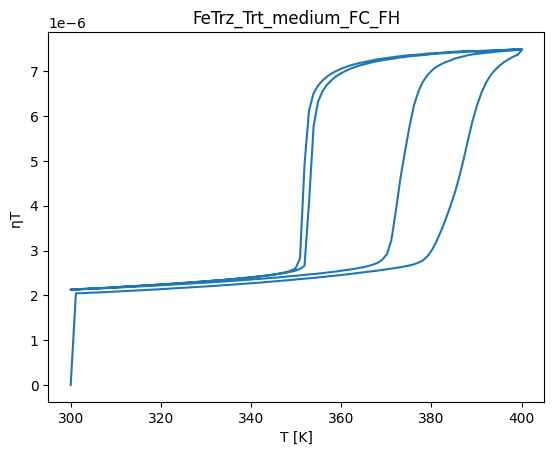

In [ ]:
plt.plot(Trt_medium_FC_FH_T, Trt_medium_FC_FH_chiT)
plt.title('FeTrz_Trt_medium_FC_FH')
plt.xlabel('T [K]')
plt.ylabel('ηT ')